In [1]:
import numpy as np
from datetime import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import inspect
import warnings
warnings.filterwarnings("ignore")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.style.use('seaborn-colorblind')
sns.set_theme()
%matplotlib inline
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 10),
          'figure.titlesize': 'x-large',
          'figure.dpi': 150,
         'axes.labelsize': 'x-large',
         'axes.titlesize': 'x-large',
         'xtick.labelsize': 'x-large',
         'ytick.labelsize': 'x-large',
         'savefig.bbox': 'tight'}

plt.rcParams.update(params)

In [2]:
df = pd.read_csv("ElectricityMap/NO-NO1.csv")

In [3]:
df["datetime"] = df["datetime"].astype("str")

def date2text(date): # Function to remove Timezone
    return str(date[:-6])
    
df["datetime"]=df["datetime"].apply(date2text)
df["datetime"] = pd.to_datetime(df["datetime"])#, format='%Y-%m-%d &h-%m-%s', errors='coerce')

In [4]:
pr = pd.read_csv("NordPool/NO1/Spot_price_NO1.csv")
pr = pr[["price", "datetime"]]
pr["datetime"] = pd.to_datetime(pr["datetime"])
# When run more than once, nothing is displayed! -> Means its OK
data = pd.merge(pr, df, on = "datetime", how = "left")
data.set_index('datetime', inplace = True)
dat = data.iloc[:41592].copy()
dat.drop('latest_forecasted_price_avg',axis=1, inplace=True)
dat.head()

,price,created_at,updated_at,timestamp,zone_name,carbon_intensity_avg,carbon_intensity_production_avg,carbon_intensity_discharge_avg,carbon_intensity_import_avg,total_production_avg,...,latest_forecasted_precipitation_avg,latest_forecasted_production_avg,latest_forecasted_consumption_avg,latest_forecasted_power_net_import_NO-NO2_avg,latest_forecasted_power_net_import_NO-NO3_avg,latest_forecasted_power_net_import_NO-NO5_avg,latest_forecasted_power_net_import_SE_avg,latest_forecasted_power_net_import_SE-SE3_avg,latest_forecasted_production_solar_avg,latest_forecasted_production_wind_avg
datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-02 00:00:00,29.36,2021-06-17 20:23:36.293191+00:00,2021-09-09 05:10:57.329255+00:00,1.483315e+09,NO-NO1,42.51,25.84,NaN,50.08,1522.0,...,0.67,1551.0,4502.0,774.0,100.0,1175.0,935.0,935.0,0.0,0.0
2017-01-02 01:00:00,29.40,2021-06-17 21:12:22.094662+00:00,2021-09-09 05:13:23.709984+00:00,1.483319e+09,NO-NO1,44.40,25.80,NaN,54.25,1553.0,...,NaN,1533.0,4525.0,962.0,100.0,861.0,1038.0,1038.0,0.0,0.0
2017-01-02 02:00:00,28.91,2021-06-17 20:55:26.185058+00:00,2021-09-09 05:13:22.256011+00:00,1.483322e+09,NO-NO1,44.84,25.79,NaN,54.34,1560.0,...,NaN,1537.0,4551.0,855.0,100.0,936.0,1072.0,1072.0,0.0,0.0
2017-01-02 03:00:00,28.11,2021-06-17 20:23:59.710732+00:00,2021-09-09 05:13:21.529490+00:00,1.483326e+09,NO-NO1,41.93,25.77,NaN,51.12,1578.0,...,NaN,1573.0,4653.0,653.0,100.0,1290.0,1048.0,1048.0,0.0,0.0
2017-01-02 04:00:00,28.24,2021-06-17 20:40:13.314159+00:00,2021-06-17 20:40:13.314159+00:00,1.483330e+09,NO-NO1,29.71,25.61,NaN,33.32,1735.0,...,NaN,1763.0,4875.0,1623.0,0.0,2258.0,-581.0,-581.0,0.0,0.0


In [5]:
num_vars = dat.columns[dat.dtypes != 'object']

In [6]:
dat.dropna(axis=1, thresh=int(.3*len(dat)), inplace=True)
cop = dat.copy()
missin_data = cop["carbon_intensity_avg"].isnull()
dat.interpolate(inplace=True)
dat[missin_data] ## When running twice showuld display nothing since there are no rows with NaNs

,price,created_at,updated_at,timestamp,zone_name,carbon_intensity_avg,carbon_intensity_production_avg,carbon_intensity_import_avg,total_production_avg,total_import_avg,...,latest_forecasted_precipitation_avg,latest_forecasted_production_avg,latest_forecasted_consumption_avg,latest_forecasted_power_net_import_NO-NO2_avg,latest_forecasted_power_net_import_NO-NO3_avg,latest_forecasted_power_net_import_NO-NO5_avg,latest_forecasted_power_net_import_SE_avg,latest_forecasted_power_net_import_SE-SE3_avg,latest_forecasted_production_solar_avg,latest_forecasted_production_wind_avg
datetime,,,,,,,,,,,,,,,,,,,,,
2017-09-17 00:00:00,30.82,2021-06-17 20:41:19.212621+00:00,2021-08-05 18:59:38.289633+00:00,1.505606e+09,NO-NO1,32.902817,29.069155,43.470000,2714.267606,1074.63,...,0.050000,2524.0,2742.0,541.0,-200.0,383.0,-700.0,-700.0,0.0,0.0
2017-09-17 01:00:00,31.51,2021-06-17 20:40:23.274840+00:00,2021-08-05 19:00:06.841197+00:00,1.505610e+09,NO-NO1,32.915634,29.068310,43.090000,2714.535211,918.08,...,0.036667,2505.0,2713.0,728.0,-150.0,143.0,-700.0,-700.0,0.0,0.0
2017-09-17 02:00:00,30.40,2021-06-17 20:56:30.061303+00:00,2021-08-05 18:59:38.289633+00:00,1.505614e+09,NO-NO1,32.928451,29.067465,44.670000,2714.802817,822.09,...,0.023333,2501.0,2737.0,717.0,-100.0,99.0,-700.0,-700.0,0.0,0.0
2017-09-17 03:00:00,30.06,2021-06-17 20:23:41.479852+00:00,2021-08-05 18:59:38.289633+00:00,1.505617e+09,NO-NO1,32.941268,29.066620,45.600000,2715.070423,899.25,...,0.010000,2502.0,2740.0,589.0,0.0,149.0,-700.0,-700.0,0.0,0.0
2017-09-17 04:00:00,29.43,2021-06-17 20:22:58.681896+00:00,2021-08-05 18:59:40.694606+00:00,1.505621e+09,NO-NO1,32.954085,29.065775,44.650000,2715.338028,796.82,...,0.013333,2512.0,2785.0,421.0,0.0,367.0,-700.0,-700.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-16 03:00:00,39.49,2021-06-17 09:28:53.479696+00:00,2021-12-21 03:42:41.148429+00:00,1.539659e+09,NO-NO1,26.326667,25.980000,47.538333,1734.000000,0.00,...,0.040000,1924.0,3077.0,-677.0,-100.0,2500.0,-750.0,-750.0,0.0,0.0
2020-07-25 16:00:00,1.56,2021-06-17 10:03:51.711085+00:00,2021-09-09 05:10:57.329255+00:00,1.595693e+09,NO-NO1,29.418000,26.050000,40.730000,2417.000000,1831.25,...,0.246667,2443.0,2262.0,0.0,100.0,1514.0,-1550.0,-1550.0,0.0,21.0
2020-07-25 17:00:00,1.55,2021-06-17 10:03:51.711085+00:00,2021-12-01 14:39:19.134615+00:00,1.595696e+09,NO-NO1,28.666000,26.050000,39.310000,2410.000000,1518.72,...,0.483333,2431.0,1982.0,0.0,100.0,1481.0,-1550.0,-1550.0,0.0,18.0


In [15]:
rank_cor =dat.corr(method='spearman')
rank_target = abs(rank_cor["price"])
#print(rank_target) #### Use to determine the threshold
relevant_features = rank_target[rank_target > 0.22] # Set in 0.2 to include several and ease of reprod.
relevant_features

price                               1.000000
total_production_avg                0.253202
total_import_avg                    0.233728
power_production_hydro_avg          0.238619
power_consumption_gas_avg           0.246555
latest_forecasted_production_avg    0.240974
Name: price, dtype: float64

In [16]:
dat=dat[relevant_features.index]

In [17]:
dat.head()

,price,total_production_avg,total_import_avg,power_production_hydro_avg,power_consumption_gas_avg,latest_forecasted_production_avg
datetime,,,,,,
2017-01-02 00:00:00,29.36,1522.0,3353.79,1516.0,69.09,1551.0
2017-01-02 01:00:00,29.40,1553.0,2932.53,1547.0,62.34,1533.0
2017-01-02 02:00:00,28.91,1560.0,3127.93,1554.0,59.53,1537.0
2017-01-02 03:00:00,28.11,1578.0,2774.92,1572.0,51.37,1573.0
2017-01-02 04:00:00,28.24,1735.0,1966.19,1729.0,35.80,1763.0


In [18]:
# Check missing values
num_vars = dat.columns[dat.dtypes != 'object']
dat[num_vars].isnull().sum().sort_values(ascending=False) / len(dat)

latest_forecasted_production_avg    0.0
power_consumption_gas_avg           0.0
power_production_hydro_avg          0.0
total_import_avg                    0.0
total_production_avg                0.0
price                               0.0
dtype: float64

Ready for the predictions!

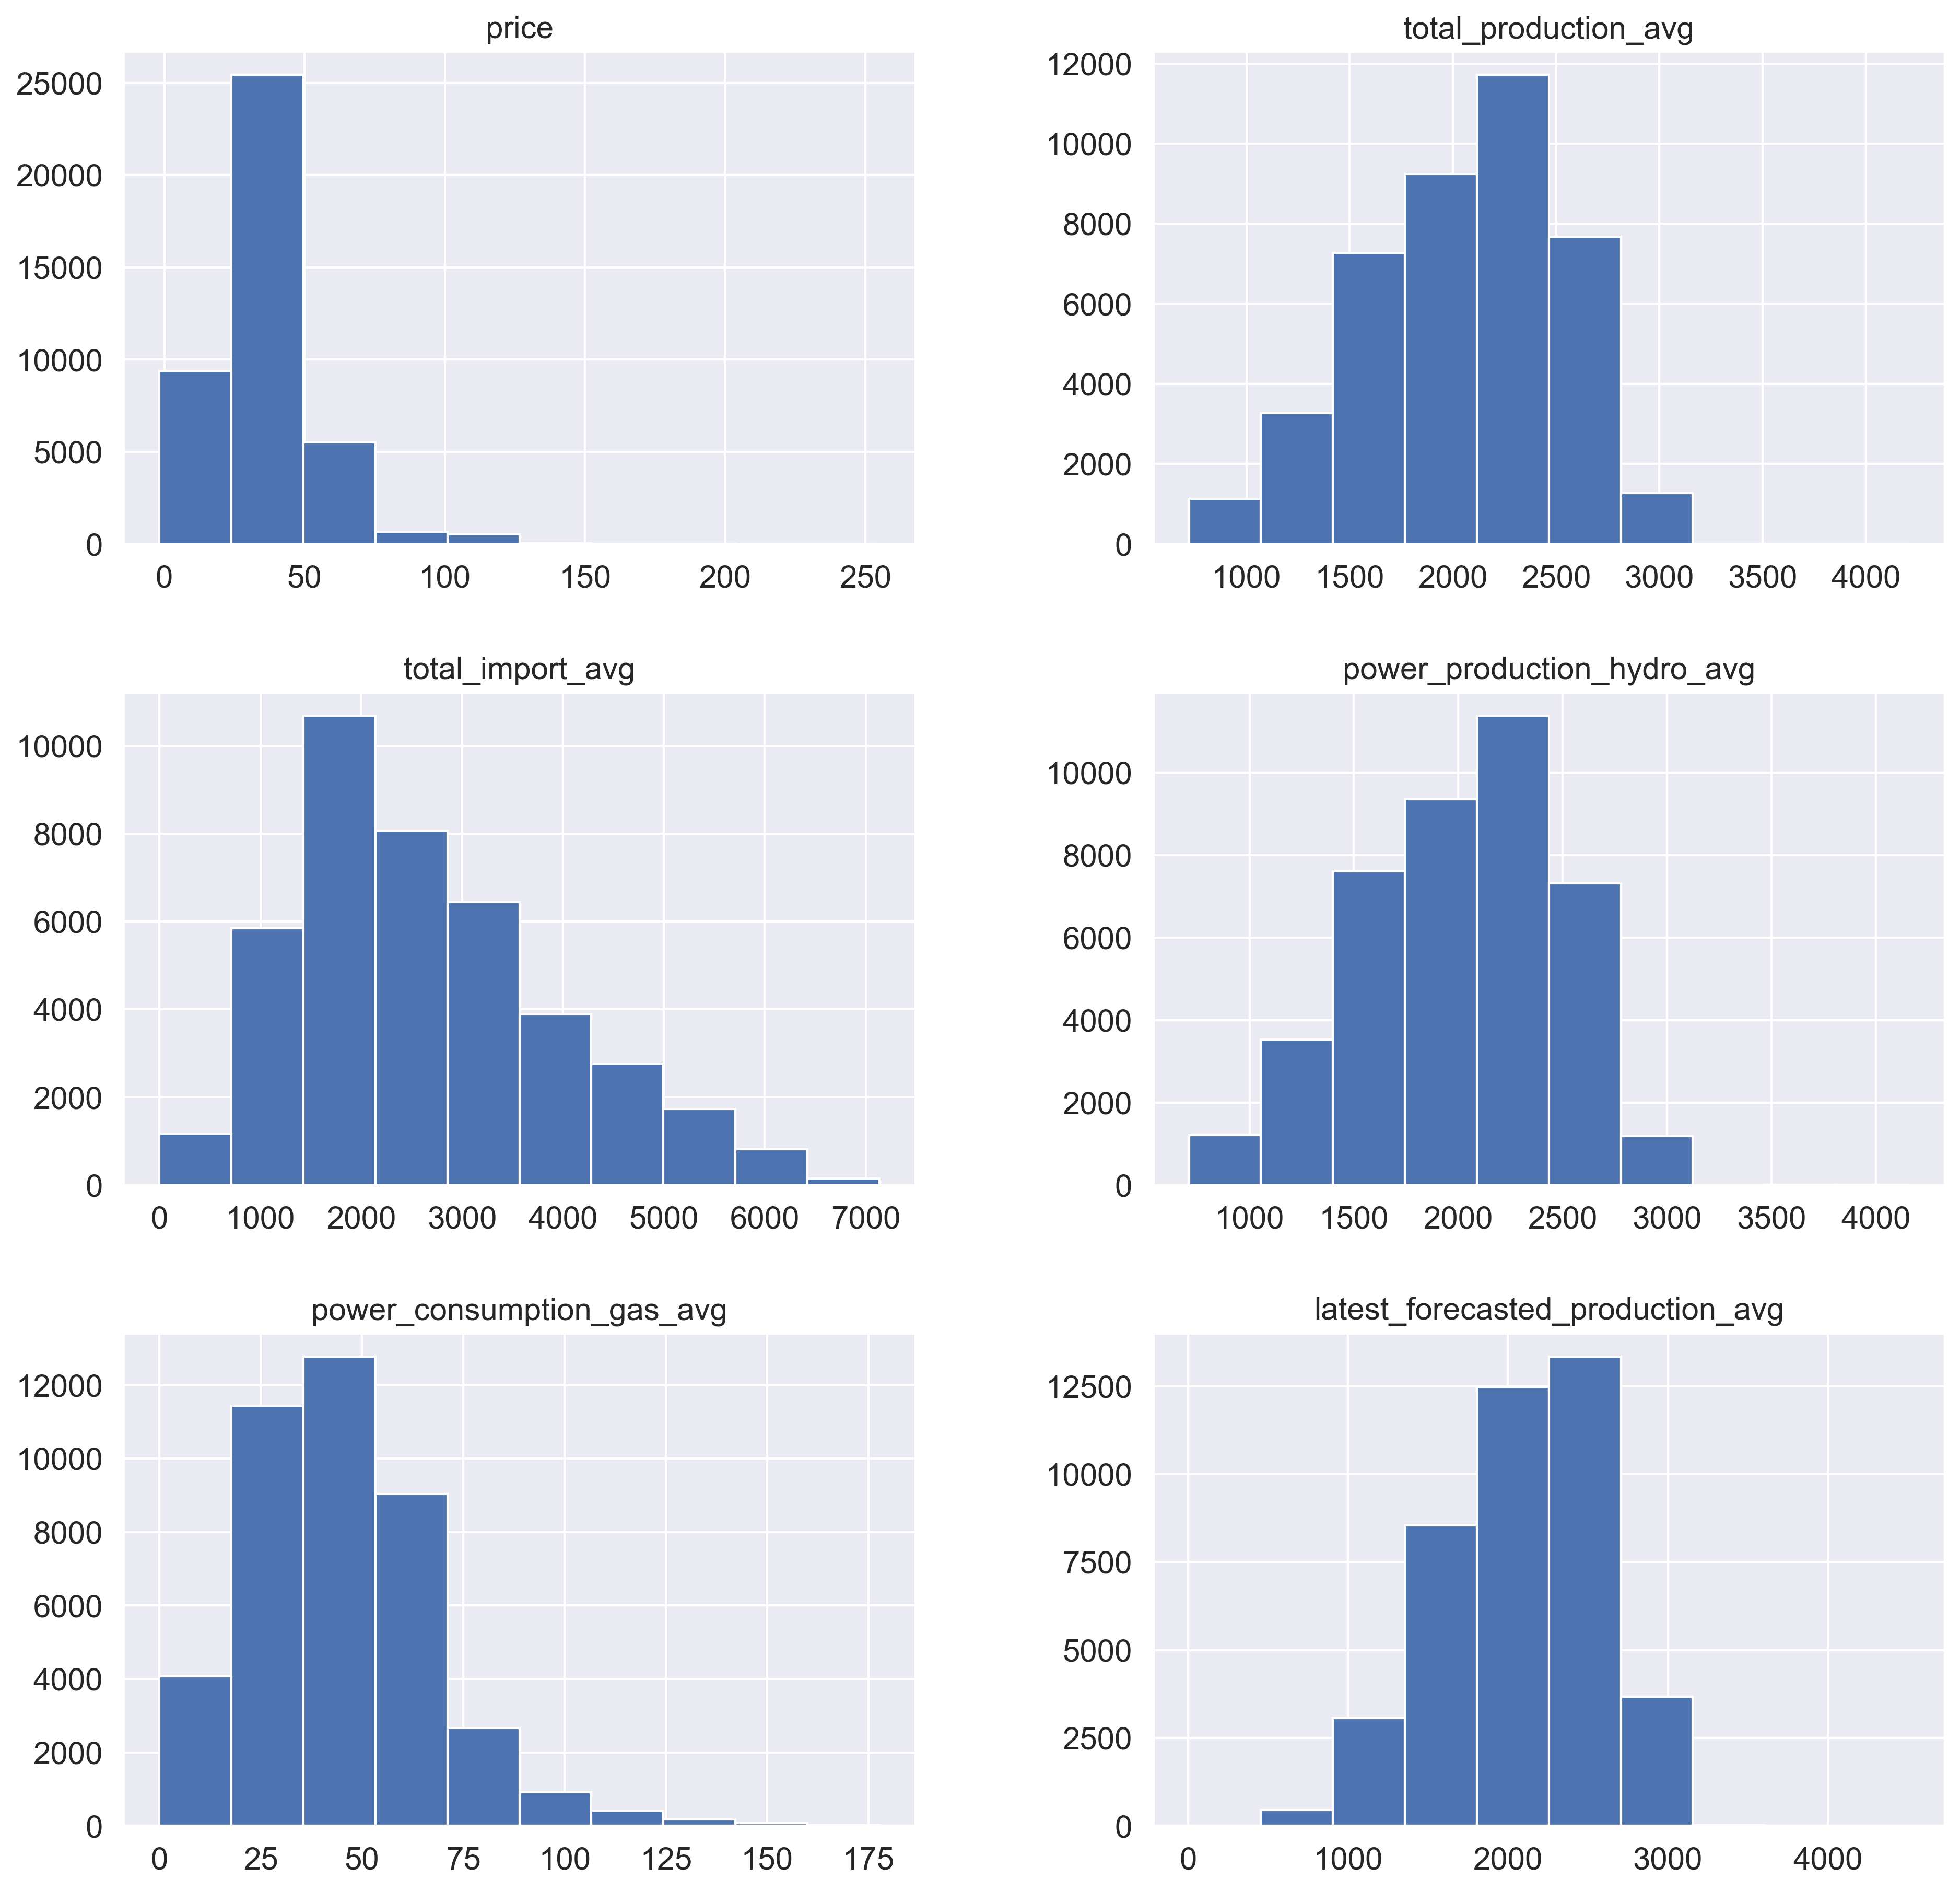

In [19]:
df_hist = dat[num_vars]
df_hist.hist(figsize=(15,15));

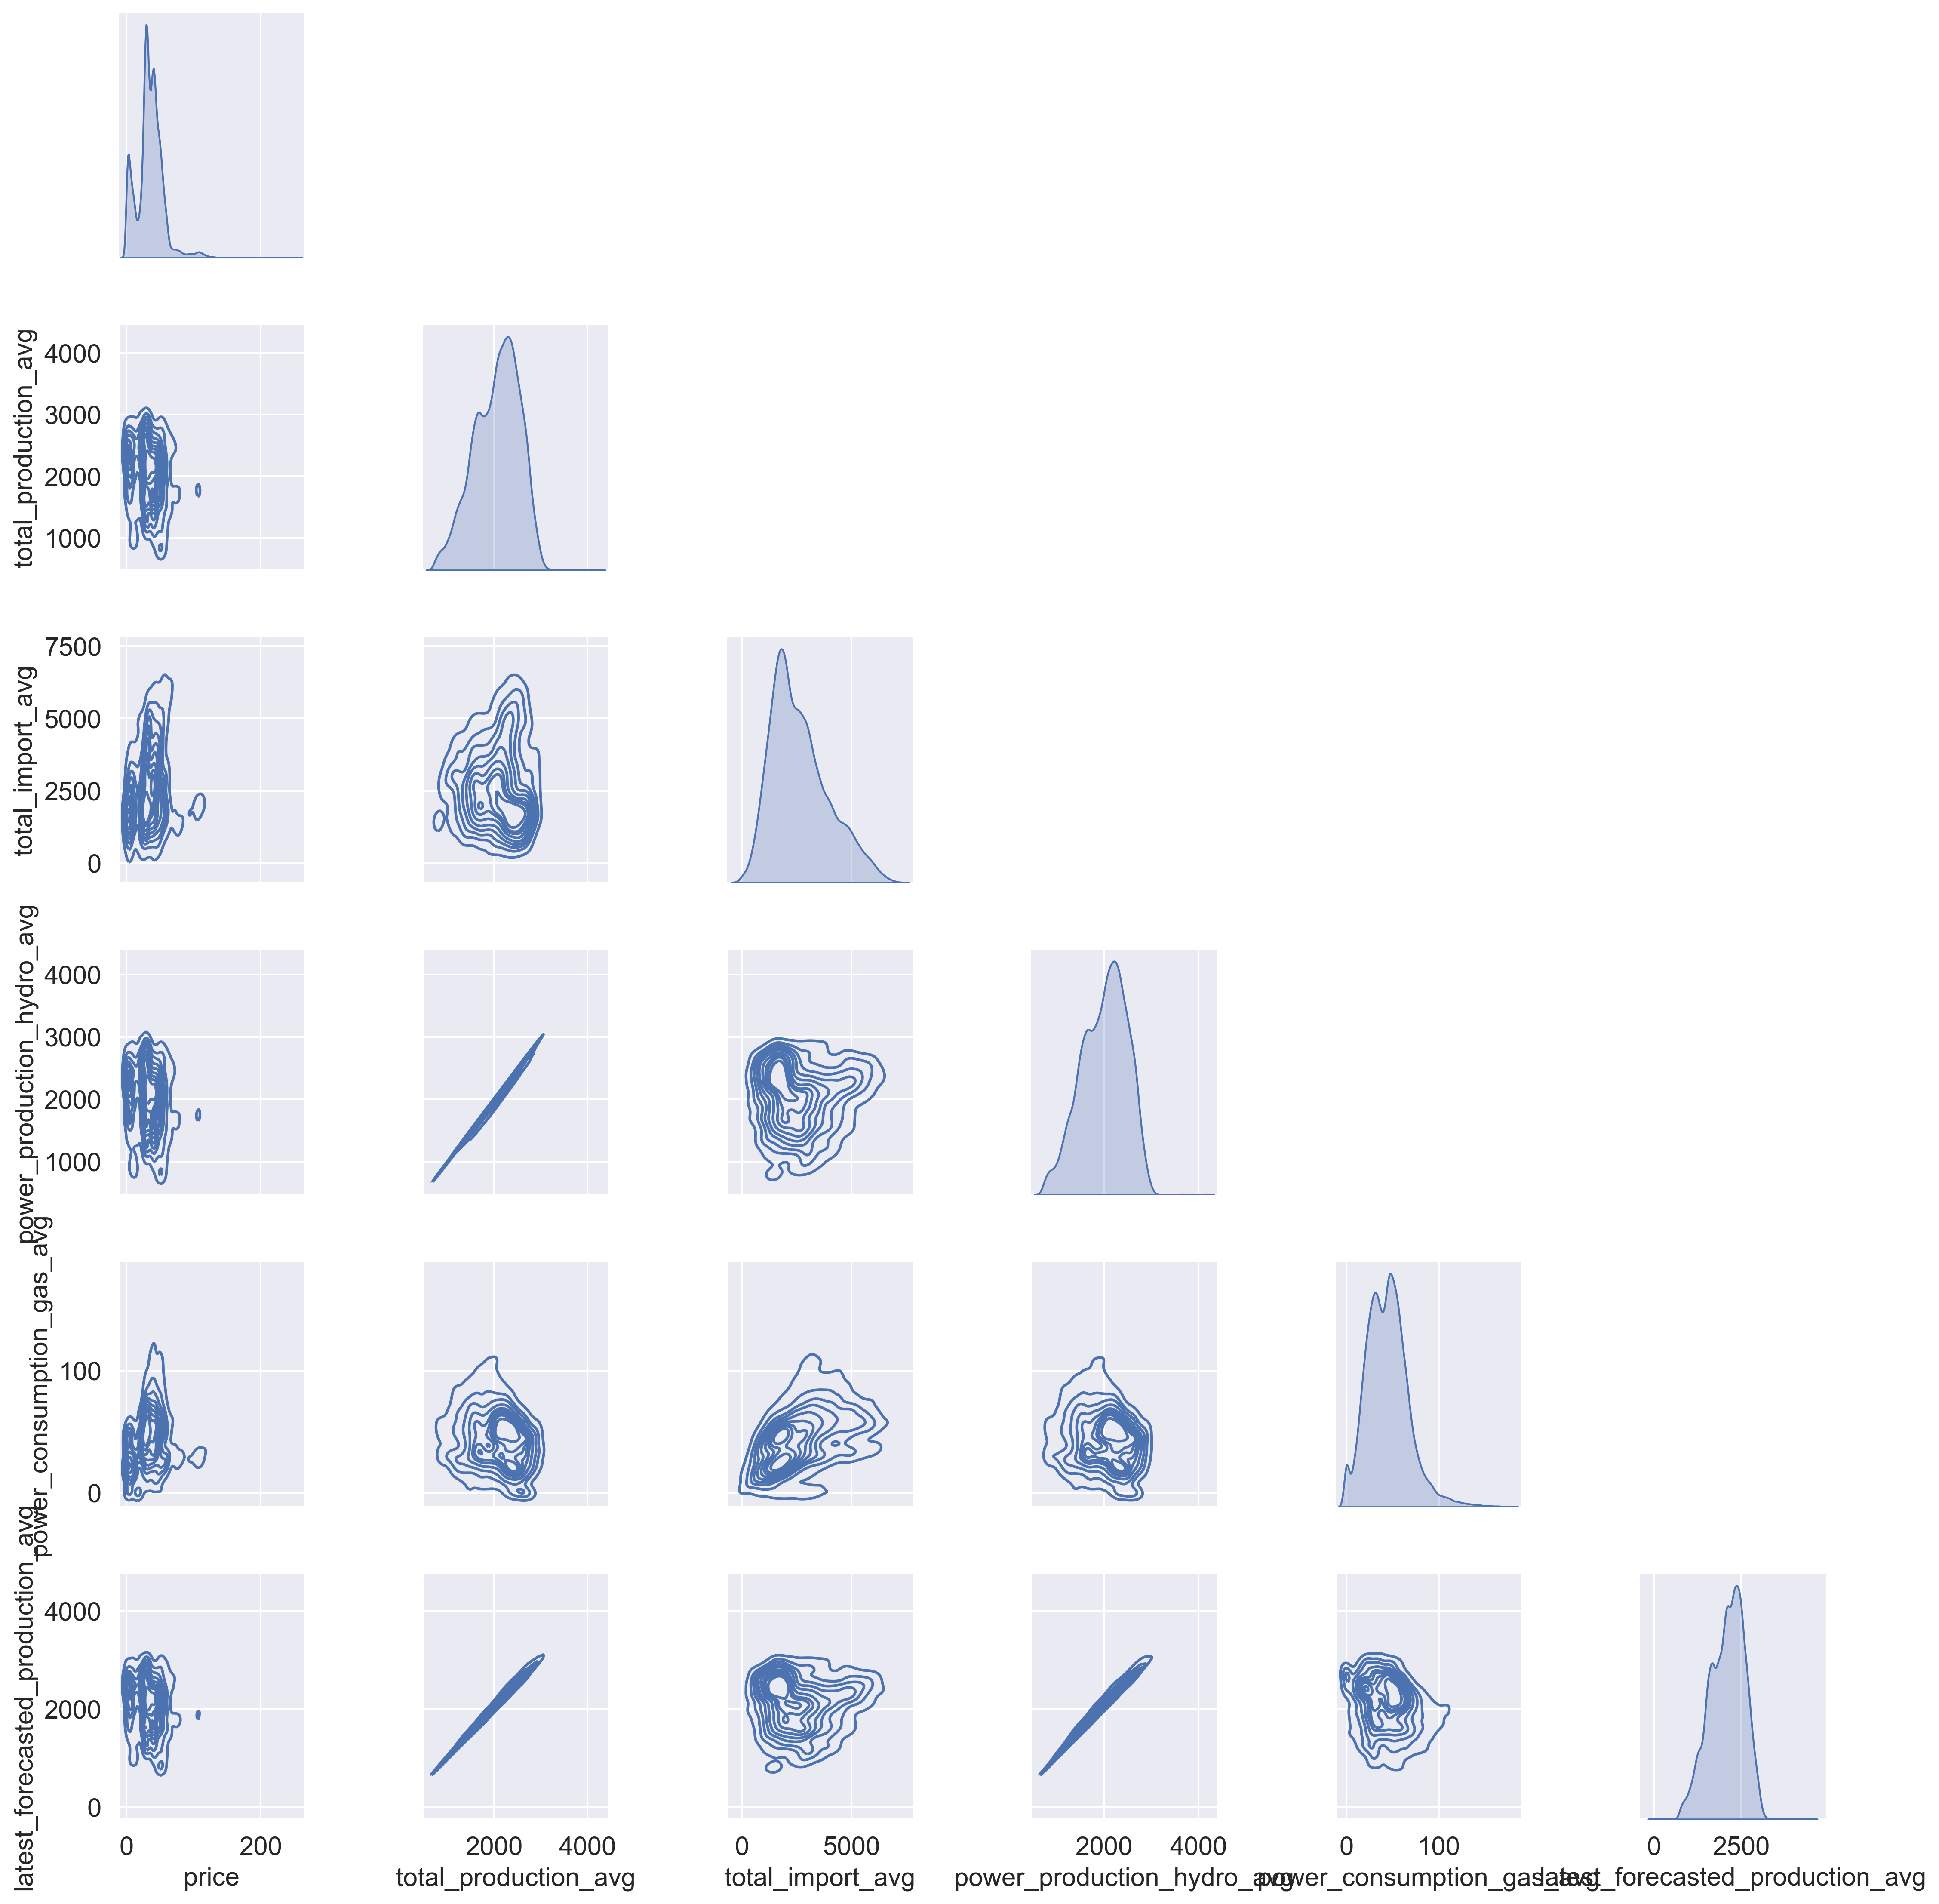

In [20]:
sns.pairplot(df_hist, corner=True, kind='kde')
plt.show()